In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("wheat dataset.csv")
df

,Date,Centre,Price
0,01-01-2010,AGARTALA,17
1,01-01-2010,AHMEDABAD,NR
2,01-01-2010,AIZAWL,14
3,01-01-2010,AMRITSAR,16.52
4,01-01-2010,Average Price,21
...,...,...,...
352735,09-12-2021,VISAKHAPATNAM,29
352736,09-12-2021,WAGHAI,NR
352737,09-12-2021,WARANGAL,43
352738,09-12-2021,WAYANAD,NaN


In [3]:
df.isnull().sum()

Date      0
Centre    1
Price     2
dtype: int64

In [4]:
# Drop rows where Price is 'NR'
df = df[df['Price'] != 'NR']
df.reset_index(drop=True, inplace=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') 
df.head()

,Date,Centre,Price
0,01-01-2010,AGARTALA,17.00
1,01-01-2010,AIZAWL,14.00
2,01-01-2010,AMRITSAR,16.52
3,01-01-2010,Average Price,21.00
4,01-01-2010,BENGALURU,15.00


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y", errors='coerce')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()


,Date,Centre,Price,Day,Month,Year
0,2010-01-01,AGARTALA,17.00,1.0,1.0,2010.0
1,2010-01-01,AIZAWL,14.00,1.0,1.0,2010.0
2,2010-01-01,AMRITSAR,16.52,1.0,1.0,2010.0
3,2010-01-01,Average Price,21.00,1.0,1.0,2010.0
4,2010-01-01,BENGALURU,15.00,1.0,1.0,2010.0


In [6]:
df['Year-Month'] = df['Date'].dt.to_period('M')  # Convert to period format
df_monthly = df.groupby('Year-Month')['Price'].mean().reset_index()


In [7]:
df_monthly['Year-Month'] = df_monthly['Year-Month'].dt.to_timestamp()

In [8]:
df_monthly.set_index('Year-Month', inplace=True)

In [9]:
df_monthly = df_monthly.asfreq('M').fillna(method='ffill')

In [10]:
train_data = df_monthly.loc['2010':'2021']

In [11]:
model = ARIMA(train_data, order=(1,1,1))  # Tune (p,d,q) if needed
model_fit = model.fit()

In [12]:
future_steps = 36
forecast = model_fit.forecast(steps=future_steps)

In [13]:
future_dates = pd.date_range(start='2022-01-01', periods=future_steps, freq='M')

In [14]:
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Price': forecast.values})
forecast_df.set_index('Date', inplace=True)

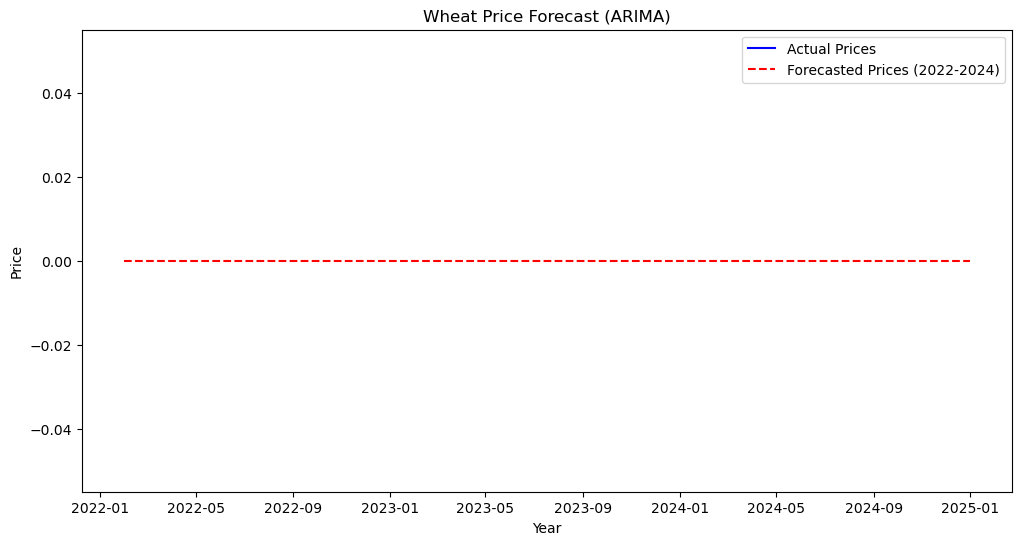

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df_monthly, label="Actual Prices", color='blue')
plt.plot(forecast_df, label="Forecasted Prices (2022-2024)", color='red', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Wheat Price Forecast (ARIMA)')
plt.legend()
plt.show()

In [17]:
comparison_df = pd.DataFrame({'Actual': df_monthly, 'Forecast': forecast})
print(comparison_df.head(10))  # Print first 10 values

ValueError: Data must be 1-dimensional, got ndarray of shape (143, 1) instead